In [172]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sqlalchemy import create_engine


import plotly
import plotly.express as px

import os

if not os.path.exists("images"):
    os.mkdir("images")

In [99]:
def url():
    url1 = 'https://testnet.bitmex.com/api/v1/funding?symbol=XBTUSD&count=500&reverse=false&startTime=2019%2F01%2F01&endTime=2019%2F12%2F31'
    url2 = 'https://testnet.bitmex.com/api/v1/funding?symbol=XBTUSD&count=500&reverse=false&startTime=2019%2F06%2F16%2020%3A00%3A00&endTime=2019%2F12%2F31'
    url3 = 'https://testnet.bitmex.com/api/v1/funding?symbol=XBTUSD&count=500&reverse=false&startTime=2019%2F11%2F30%2012%3A00%3A00&endTime=2020%2F01%2F01'
    return url1, url2, url3

In [100]:
url1 , url2 , url3 = url()

In [101]:
#the function reads data from urls
def read_data():
    
    cols = ['timestamp' , 'fundingrate']
    
    temp1=pd.read_json(url1)
    df1 = temp1[['fundingRate', 'timestamp']]
    df1 = pd.DataFrame(df1.values[:,[1,0]], columns = cols)
    print('df 1 has {} rows and {} columns'.format(df1.shape[0],df1.shape[1]))

    
    temp2=pd.read_json(url2)
    df2 = temp2[['fundingRate', 'timestamp']]
    df2 = pd.DataFrame(df2.values[:,[1,0]], columns = cols)
    print('df 2 has {} rows and {} columns'.format(df2.shape[0],df2.shape[1]))

    temp3=pd.read_json(url3)
    df3 = temp3[['fundingRate', 'timestamp']]
    df3 = pd.DataFrame(df3.values[:,[1,0]], columns = cols)
    print('df 3 has {} rows and {} columns'.format(df3.shape[0],df3.shape[1]))
    
    
    
    return df1, df2, df3
    

In [102]:
df1, df2, df3 = read_data()

df 1 has 500 rows and 2 columns
df 2 has 500 rows and 2 columns
df 3 has 95 rows and 2 columns


In [103]:
def concate():
    df = pd.concat([df1, df2, df3])
    print('df has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
    return df

In [104]:
df = concate()

df has 1095 rows and 2 columns


In [105]:
df.head()


,timestamp,fundingrate
0,2019-01-01 04:00:00,0.002225
1,2019-01-01 12:00:00,0.003138
2,2019-01-01 20:00:00,0.0001
3,2019-01-02 04:00:00,-0.000703
4,2019-01-02 12:00:00,-0.00375


In [141]:
#sql (select annual)

engine = create_engine('sqlite://', echo=False)
df.to_sql('XBT', con=engine)
sql = "SELECT x1.timestamp, (SELECT Sum(x2.fundingrate) FROM XBT as x2 WHERE x2.timestamp < x1.timestamp) FROM XBT as x1"

data =  engine.execute(sql).fetchall()

columns = ['date', 'annual']
results= pd.DataFrame.from_records(data, columns = columns)



In [142]:
#split date and time in results
def split():
    temp=results['date'].str.split(' ',expand=True)
    del results['date']
    df_split=pd.concat([temp,results],axis=1)
    headers = ['date', 'time', 'annual']
    df_split = pd.DataFrame(df_split.values[1:], columns=headers)
    del df_split['time']
    return df_split

In [143]:
results = split()
results.head()

x = results['date']
y = results['annual']

In [144]:
results.head()

,date,annual
0,2019-01-01,0.002225
1,2019-01-01,0.005363
2,2019-01-02,0.005463
3,2019-01-02,0.00476
4,2019-01-02,0.00101


In [175]:
#matplotlib plot
def plot_m(x, y):
        
    fig, ax = plt.subplots()
    
    fig.set_figwidth(14)
    fig.set_figheight(8)
    
    ax.set_xlabel('2019-01-01  -  2019-12-31',
             color='black',
             size = 'x-large')
    ax.set_ylabel('XBTUSD ANNUAL RATE',
             color='black',
             size = 'x-large')
    
    ax.tick_params(axis = 'x',
                  labelcolor = 'black',
                  labelsize = 'small',
                  grid_alpha = 0)
    ax.tick_params(axis='y',
              labelcolor = 'black',
              labelsize = 'large')
    ax.plot(x, y,  color = 'green')
    
    
    
    plt.savefig('plot.png')
    print('saved!')
    return plt.show()

saved!


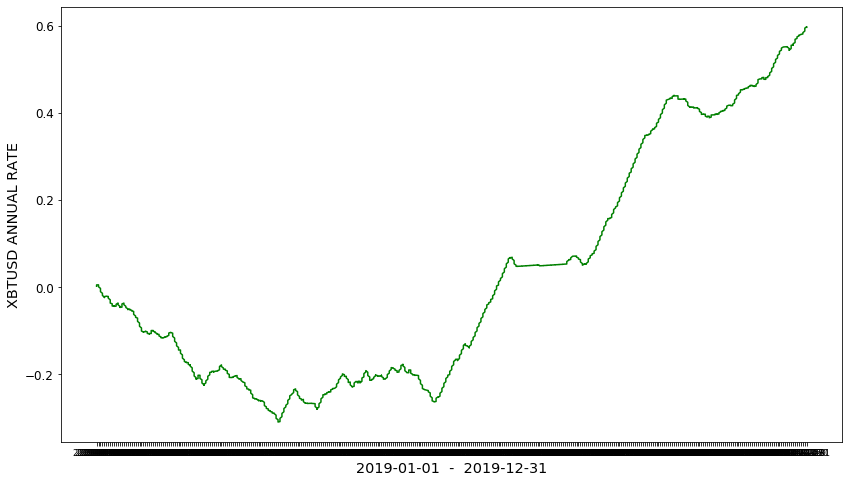

In [176]:
plot_m(x, y)

In [177]:
#plotly 
def plot_p(df):
    df_plot = df.copy()
    df_plot['2019-01-01  -  2019-12-31'] = df_plot['date']
    df_plot['Annual rate'] = df_plot['annual']
                    
    fig = px.line(df_plot, x="2019-01-01  -  2019-12-31", y="Annual rate", title='Annual XBTUSD rate in 2019')
    fig.write_image("images/fig1.png")
    return  fig.show()

In [178]:
plot_p(results)